In [1]:
# import libraries 
import numpy as np
import pandas as pd
import re
import os
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.utils import shuffle
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.preprocessing import LabelEncoder
from patsy import dmatrices
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from scipy.stats import entropy
import statsmodels.formula.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import itertools
import inspect
import datetime
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import chi2
from scipy.stats import entropy
import datetime
import plotly.graph_objects as go
!pip install optuna
import optuna
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import model_selection,ensemble,metrics
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import joblib
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from subprocess import check_output
from sklearn import model_selection
from IPython.display import display, HTML
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats import chi2_contingency
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import pandas as pd
from sklearn.linear_model import LogisticRegression
from statsmodels.tools import add_constant
import statsmodels.api as sm

In [3]:
df = pd.read_csv('Validation_Data_working_file.csv')

In [34]:
df1=df.copy()

In [4]:
#Model Validation TTes 1- Total Goods vs Total Bads percentage as a proportion of total count of borrowers
total_count = len(df)
total_goods = (df['default'] == 0).sum()
total_bads = (df['default'] == 1).sum()

goods_percent = (total_goods / total_count) * 100
bads_percent = (total_bads / total_count) * 100

print(f"Total Goods %: {goods_percent:.2f}%")
print(f"Total Bads %: {bads_percent:.2f}%")


Total Goods %: 63.47%
Total Bads %: 36.53%


In [5]:
print(df.shape[0])


1500


In [6]:
#Print count of total goods and total bads
total_goods = (df['default'] == 0).sum()
total_bads = (df['default'] == 1).sum()

print(f"Total Goods (count of 0s): {total_goods}")
print(f"Total Bads (count of 1s): {total_bads}")


Total Goods (count of 0s): 952
Total Bads (count of 1s): 548


In [7]:
print(df.shape[0])


1500


In [8]:
#Print min. and max. scores
min_score = df['Score'].min()
max_score = df['Score'].max()

print(f"Minimum Score: {min_score}")
print(f"Maximum Score: {max_score}")

Minimum Score: 61.04005322
Maximum Score: 843.3970981


In [9]:
print(df.shape[0])


1500


In [54]:
import numpy as np

def create_formatted_buckets(max_val, bucket_size, first_bucket_upper_bound):
    # Initialize list with first bucket: [0, 60)
    buckets_str = [f"[0,{first_bucket_upper_bound})"]

    # Generate lower bounds for subsequent buckets
    lower_bounds = np.arange(first_bucket_upper_bound, max_val + bucket_size, bucket_size)

    # Create buckets in [lower, upper) format
    for lb in lower_bounds:
        ub = lb + bucket_size
        buckets_str.append(f"[{int(lb)},{int(ub)})")
        
    return buckets_str

# Parameters
min_actual = 61  # Not used in this logic
max_actual = 843
bucket_interval = 12
initial_bucket_upper_limit = 60

generated_buckets = create_formatted_buckets(max_actual, bucket_interval, initial_bucket_upper_limit)

# Output
print("Formatted Buckets (Inclusive Lower, Exclusive Upper):")
for bucket in generated_buckets:
    print(bucket)


Formatted Buckets (Inclusive Lower, Exclusive Upper):
[0,60)
[60,72)
[72,84)
[84,96)
[96,108)
[108,120)
[120,132)
[132,144)
[144,156)
[156,168)
[168,180)
[180,192)
[192,204)
[204,216)
[216,228)
[228,240)
[240,252)
[252,264)
[264,276)
[276,288)
[288,300)
[300,312)
[312,324)
[324,336)
[336,348)
[348,360)
[360,372)
[372,384)
[384,396)
[396,408)
[408,420)
[420,432)
[432,444)
[444,456)
[456,468)
[468,480)
[480,492)
[492,504)
[504,516)
[516,528)
[528,540)
[540,552)
[552,564)
[564,576)
[576,588)
[588,600)
[600,612)
[612,624)
[624,636)
[636,648)
[648,660)
[660,672)
[672,684)
[684,696)
[696,708)
[708,720)
[720,732)
[732,744)
[744,756)
[756,768)
[768,780)
[780,792)
[792,804)
[804,816)
[816,828)
[828,840)
[840,852)
[852,864)


In [11]:
print(df.shape[0])


1500


In [12]:
print(df.head(5))

   branch  ncust  customer  age  ed  employ  address  income  debtinc  creddebt  othdebt  default         Y   pd_pred  Default_Pred  Grade       Score
0       3   3017     10012   28   2       7        2      44     17.7      2.99     4.80        0  0.517544  0.626573             1     12  472.189844
1       3   3017     10017   64   5      34       17     116     14.7      5.05    12.00        0 -6.042531  0.002370             0      2  661.473571
2       3   3017     10030   40   1      20       12      61      4.8      1.04     1.89        0 -4.971149  0.006887             0      4  630.560048
3       3   3017     10039   30   1      11        3      27     34.5      1.75     7.56        0  0.737179  0.676379             1     12  465.852521
4       3   3017     10069   25   1       2        2      30     22.4      0.76     5.96        1  1.182130  0.765330             1     12  453.013953


In [13]:
print(df.shape[0])


1500


In [56]:
#Create a new dataframe with count of goods and bads
import pandas as pd
import numpy as np

# Step 1: Create bins and labels (without modifying df)
start = 0
first_bin_end = 60
step = 12
max_score = df['Score'].max()

# Generate bin edges: [0, 60, 72, 84, ...]
bins = [start, first_bin_end]
while bins[-1] < max_score:
    bins.append(bins[-1] + step)

# Step 2: Create formatted labels like [0,60), [60,72), ...
labels = [f"[{bins[i]},{bins[i+1]})" for i in range(len(bins) - 1)]

# Step 3: Create a temporary bucketing Series
# right=False → lower-inclusive, upper-exclusive
bucket_series = pd.cut(df['Score'], bins=bins, labels=labels, right=False, include_lowest=True)

# Step 4: Group by bucket and count goods and bads
grouped = df.groupby(bucket_series)['Default_Pred'].value_counts().unstack(fill_value=0)

# Step 5: Rename and reset index to get a standalone DataFrame
bucket_df = grouped.rename(columns={0: 'Count of Goods', 1: 'Count of Bads'})
bucket_df.index.name = 'Score Buckets'  # optional clarity
bucket_df = bucket_df.reset_index()

# Step 6: View result
print(bucket_df.head())


Default_Pred Score Buckets  Count of Goods  Count of Bads
0                   [0,60)               0              0
1                  [60,72)               0              1
2                  [72,84)               0              0
3                  [84,96)               0              0
4                 [96,108)               0              0


C:\Users\swara\AppData\Local\Temp\ipykernel_9304\3780903429.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(bucket_series)['Default_Pred'].value_counts().unstack(fill_value=0)


In [58]:
total_goods = bucket_df['Count of Goods'].sum()
total_bads = bucket_df['Count of Bads'].sum()

print(f"Total Goods: {total_goods}")
print(f"Total Bads: {total_bads}")


Total Goods: 874
Total Bads: 626


In [60]:
#Print max. no. of goods and bads in each bucket alongwith their corresponding buckets
# Max goods and corresponding bucket
max_goods = bucket_df['Count of Goods'].max()
goods_bucket = bucket_df[bucket_df['Count of Goods'] == max_goods]['Score Buckets'].values[0]

# Max bads and corresponding bucket
max_bads = bucket_df['Count of Bads'].max()
bads_bucket = bucket_df[bucket_df['Count of Bads'] == max_bads]['Score Buckets'].values[0]

print(f"Bucket with max goods: {goods_bucket} → {max_goods} goods")
print(f"Bucket with max bads: {bads_bucket} → {max_bads} bads")


Bucket with max goods: [504,516) → 147 goods
Bucket with max bads: [480,492) → 155 bads


In [62]:
#Print Marginal goods and Marginal bads in each bucket
# Step 1: Calculate totals
total_goods = bucket_df['Count of Goods'].sum()
total_bads = bucket_df['Count of Bads'].sum()

# Step 2: Add percentage columns
bucket_df['Marginal_goods'] = (bucket_df['Count of Goods'] / total_goods * 100).round(2).astype(str) + '%'
bucket_df['Marginal_bads'] = (bucket_df['Count of Bads'] / total_bads * 100).round(2).astype(str) + '%'

# Step 3: View result
print(bucket_df[['Score Buckets', 'Count of Goods', 'Count of Bads', 'Marginal_goods', 'Marginal_bads']].head())

# Compute totals using the original numeric values
total_marginal_goods = (bucket_df['Count of Goods'].sum() / total_goods) * 100
total_marginal_bads = (bucket_df['Count of Bads'].sum() / total_bads) * 100

print(f"Total of Marginal_goods: {total_marginal_goods:.2f}%")
print(f"Total of Marginal_bads: {total_marginal_bads:.2f}%")


Default_Pred Score Buckets  Count of Goods  Count of Bads Marginal_goods Marginal_bads
0                   [0,60)               0              0           0.0%          0.0%
1                  [60,72)               0              1           0.0%         0.16%
2                  [72,84)               0              0           0.0%          0.0%
3                  [84,96)               0              0           0.0%          0.0%
4                 [96,108)               0              0           0.0%          0.0%
Total of Marginal_goods: 100.00%
Total of Marginal_bads: 100.00%


In [64]:
#Print max. no. of goods and bads in each bucket alongwith their corresponding buckets
# Max goods and corresponding bucket
max_goods = bucket_df['Marginal_goods'].max()
goods_bucket = bucket_df[bucket_df['Marginal_goods'] == max_goods]['Score Buckets'].values[0]

# Max bads and corresponding bucket
max_bads = bucket_df['Marginal_bads'].max()
bads_bucket = bucket_df[bucket_df['Marginal_bads'] == max_bads]['Score Buckets'].values[0]

print(f"Bucket with max goods: {goods_bucket} → {max_goods} goods")
print(f"Bucket with max bads: {bads_bucket} → {max_bads} bads")

Bucket with max goods: [540,552) → 9.73% goods
Bucket with max bads: [444,456) → 9.11% bads


In [66]:
#Add new column with range 1 upto the point where rows end aligning with Score Buckets
bucket_df = bucket_df.sort_values(by='Score Buckets')  # sort by bucket labels if needed
bucket_df['Bucket_No'] = range(1, len(bucket_df) + 1)


In [68]:
print(bucket_df.head())

Default_Pred Score Buckets  Count of Goods  Count of Bads Marginal_goods Marginal_bads  Bucket_No
0                   [0,60)               0              0           0.0%          0.0%          1
1                  [60,72)               0              1           0.0%         0.16%          2
2                  [72,84)               0              0           0.0%          0.0%          3
3                  [84,96)               0              0           0.0%          0.0%          4
4                 [96,108)               0              0           0.0%          0.0%          5


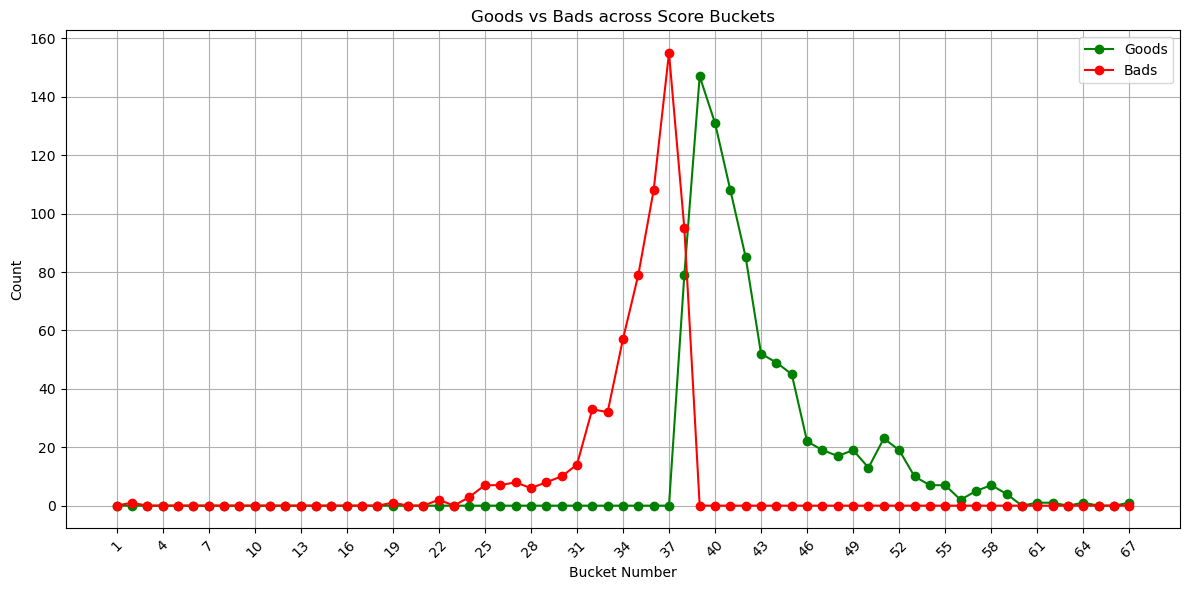

In [78]:
#Plot goods vs bads
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot lines
plt.plot(bucket_df['Bucket_No'], bucket_df['Count of Goods'], label='Goods', color='green', marker='o')
plt.plot(bucket_df['Bucket_No'], bucket_df['Count of Bads'], label='Bads', color='red', marker='o')

# Set custom x-ticks and tilt them at 45 degrees
plt.xticks(bucket_df['Bucket_No'], labels=bucket_df['Bucket_No'], rotation=45)


# Labels and title
plt.xlabel('Bucket Number')
plt.ylabel('Count')
plt.title('Goods vs Bads across Score Buckets')

# Set spaced ticks: Show every 2nd or 3rd tick depending on total buckets
step = 2 if len(bucket_df) <= 20 else 3
plt.xticks(bucket_df['Bucket_No'][::step])  # Skip every few ticks for clarity

# Add grid, legend, and spacing
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [80]:
#Print bads at bucket 37
# Assuming bucket_df has a column named 'Bucket_No' and 'Count of Bads'
bucket_37_bads = bucket_df.loc[bucket_df['Bucket_No'] == 37, 'Count of Bads'].values

if len(bucket_37_bads) > 0:
    print(f"Count of Bads in Bucket 37: {bucket_37_bads[0]}")
else:
    print("Bucket 37 not found.")


Count of Bads in Bucket 37: 155


In [82]:
#Add 2 new columns in the dataframe- Cumulative Goods % and Cumulative Bads %
# Compute total goods and bads
total_goods = bucket_df['Count of Goods'].sum()
total_bads = bucket_df['Count of Bads'].sum()

# Add cumulative sum columns
bucket_df['Cumulative Goods'] = bucket_df['Count of Goods'].cumsum()
bucket_df['Cumulative Bads'] = bucket_df['Count of Bads'].cumsum()

# Compute cumulative % and format as string with % sign
bucket_df['Cumulative Goods %'] = (bucket_df['Cumulative Goods'] / total_goods * 100).round(2).astype(str) + '%'
bucket_df['Cumulative Bads %'] = (bucket_df['Cumulative Bads'] / total_bads * 100).round(2).astype(str) + '%'

# Optional: Drop intermediate cumulative counts if not needed
# bucket_df.drop(['Cumulative Goods', 'Cumulative Bads'], axis=1, inplace=True)

# View updated DataFrame
print(bucket_df[['Score Buckets', 'Count of Goods', 'Count of Bads', 'Cumulative Goods %', 'Cumulative Bads %']].head())


Default_Pred Score Buckets  Count of Goods  Count of Bads Cumulative Goods % Cumulative Bads %
0                   [0,60)               0              0               0.0%              0.0%
1                  [60,72)               0              1               0.0%             0.16%
2                  [72,84)               0              0               0.0%             0.16%
3                  [84,96)               0              0               0.0%             0.16%
4                 [96,108)               0              0               0.0%             0.16%


In [86]:
#Print final cumulative values
print("Final Cumulative Goods %:", bucket_df['Cumulative Goods %'].iloc[-1])
print("Final Cumulative Bads %:", bucket_df['Cumulative Bads %'].iloc[-1])


Final Cumulative Goods %: 100.0%
Final Cumulative Bads %: 100.0%


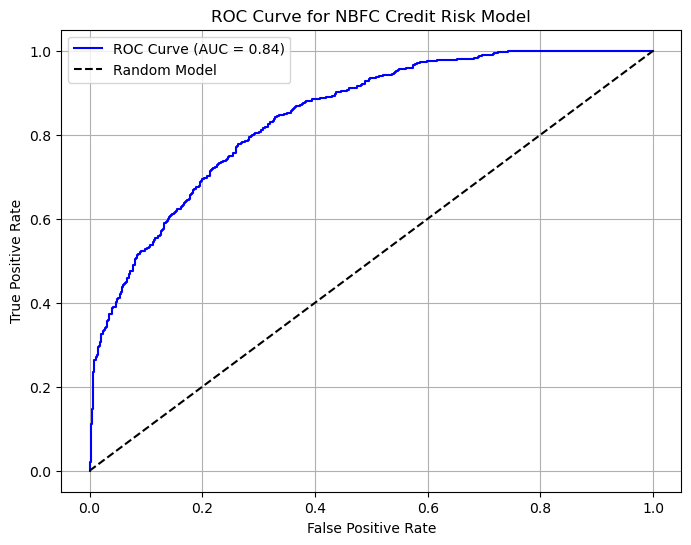

In [116]:
# Plot ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Check if Score is inversely coded (higher Score = lower default risk)
# If higher Score indicates non-default (0), invert it
score_transformed = -df['Score']  # Use negative Score to flip direction
# Alternatively, if Score is a probability for non-default: score_transformed = 1 - df['Score']

# Use 'default' as true labels
fpr, tpr, thresholds = roc_curve(df['default'], score_transformed)
roc_auc = roc_auc_score(df['default'], score_transformed)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for NBFC Credit Risk Model')
plt.legend()
plt.grid()
plt.show()

In [118]:
print("AUC:", roc_auc)
print(df.groupby('Default_Pred')['Score'].describe())


AUC: 0.8436024044654358
              count        mean        std         min         25%         50%         75%         max
Default_Pred                                                                                          
0             874.0  556.084697  57.268222  498.875052  515.416224  536.296251  577.520942  843.397098
1             626.0  461.413610  39.913955   61.040053  450.259091  473.377459  487.612445  498.797691
